In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

In [2]:
from indra.common import Circle
from indra.mobius import MobiusTransformation as Mobius

In [3]:
# Project 4.1
# transformations
s, t = 0.1, 0.9

a = Mobius(s+t, -2*s*t, -2, s+t)
A = a.inv()
b = Mobius(s+t, 2, 2*s*t, s+t)
B = b.inv()

gens = [a, b, A, B]
invs = [2, 3, 0, 1]

# circles paired by these transformations
r1 = (t - s) / 2
r2 = (1/s - 1/t) / 2

C_a = Circle(complex(s + r1, 0), r1)
C_A = Circle(complex(-s - r1, 0), r1)
C_b = Circle(complex(1/t + r2, 0), r2)
C_B = Circle(complex(-1/t - r2, 0), r2)

circs = [C_a, C_b, C_A, C_B]
tags = ['r', 'b', 'y', 'g']

In [4]:
def plot_circle(C, ax, color='k', fill=True):
    circ = plt.Circle((C.center.real, C.center.imag), C.radius, color=color, fill=fill)
    ax.add_artist(circ)

In [5]:
# Enumerate words with breadth-first search
def bfs(gens, invs, tags, max_level=5):
    current = list(zip(gens, tags))
    for l in range(max_level+1):
        next_level = []
        for seed, tag in current:
            yield seed, tag
            for i in range(len(gens)):
                if i == invs[tags.index(tag)]:
                    continue
                next_level.append((seed(gens[i]), tags[i]))
        current = next_level

In [6]:
def plot_tiles(gens, invs, tags, circs, max_level=5):
    """Tiling plots of circles generated by sets of Mobius transformations"""
    # TODO: option to color by level rather than tag?
    # set up figure
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')

    ax.set_xlim((
        max(C.center.real + C.radius for C in circs),
        min(C.center.real - C.radius for C in circs)
    ))
    ax.set_ylim((
        max(C.center.imag + C.radius for C in circs),
        min(C.center.imag - C.radius for C in circs)
    ))
    
    # seed circles
    for C, color in zip(circs, tags):
        plot_circle(C, ax, color=color)

    # iterations
    for T, color in bfs(gens, invs, tags, max_level=max_level):
        new_circs = [T(C) for C in circs]
        for C in new_circs:
            plot_circle(C, ax, color=color)

<IPython.core.display.Javascript object>


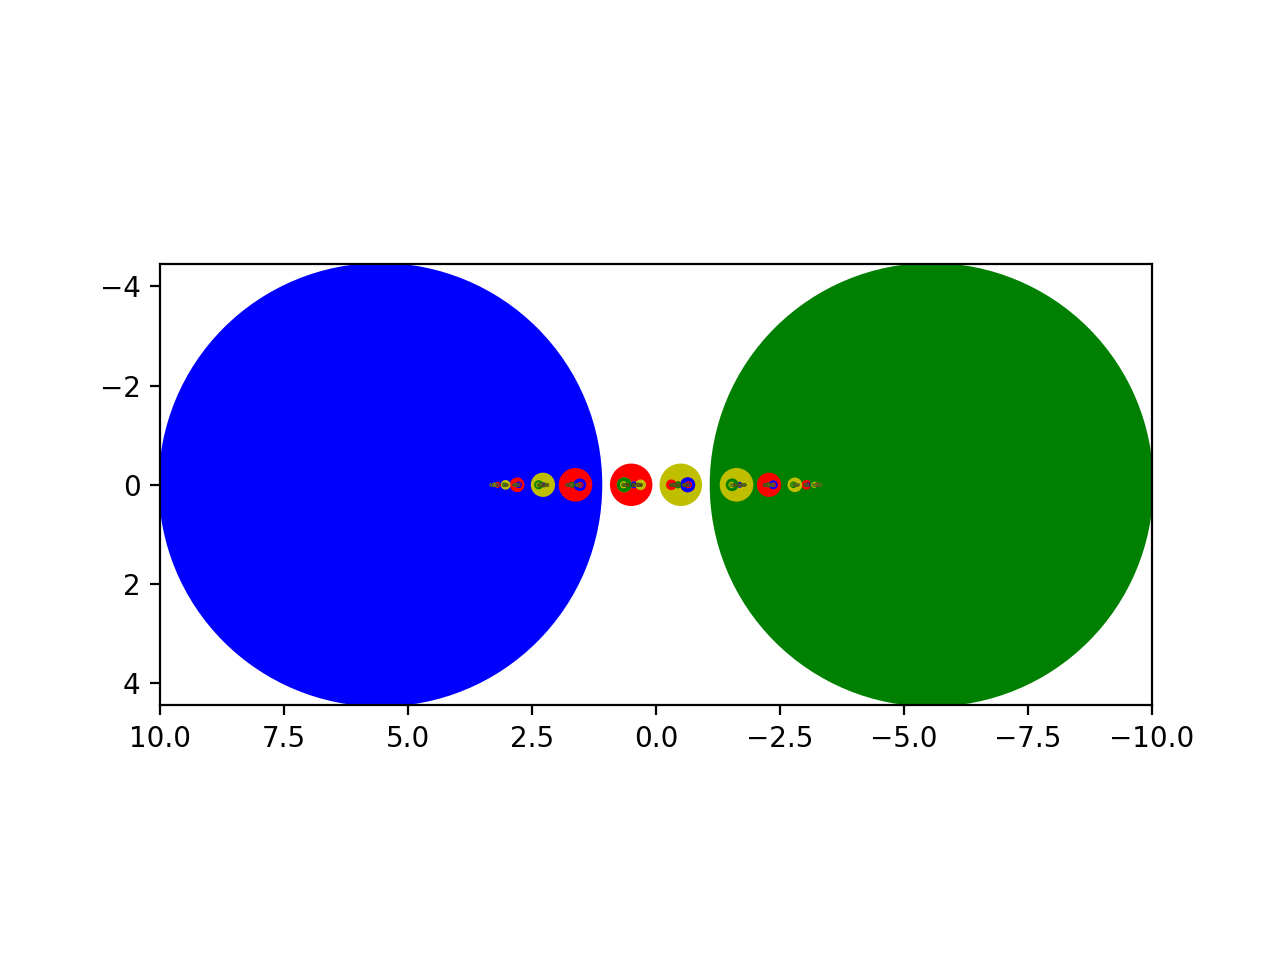

In [7]:
plot_tiles(gens, invs, tags, circs)

In [8]:
# Project 4.2
theta = np.pi / 4

a = Mobius(1 / np.sin(theta) * np.array([[1, complex(0, np.cos(theta))], [complex(0, -np.cos(theta)), 1]]))
A = a.inv()
b = Mobius(1 / np.sin(theta) * np.array([[1, np.cos(theta)], [np.cos(theta), 1]]))
B = b.inv()

gens = [a, b, A, B]
invs = [2, 3, 0, 1]

P = 1 / np.cos(theta)
r = np.tan(theta)

C_a = Circle(complex(0, P), r)
C_A = Circle(complex(0, -P), r)
C_b = Circle(complex(P, 0), r)
C_B = Circle(complex(-P, 0), r)

circs = [C_a, C_b, C_A, C_B]
tags = ['r', 'b', 'y', 'g']

<IPython.core.display.Javascript object>


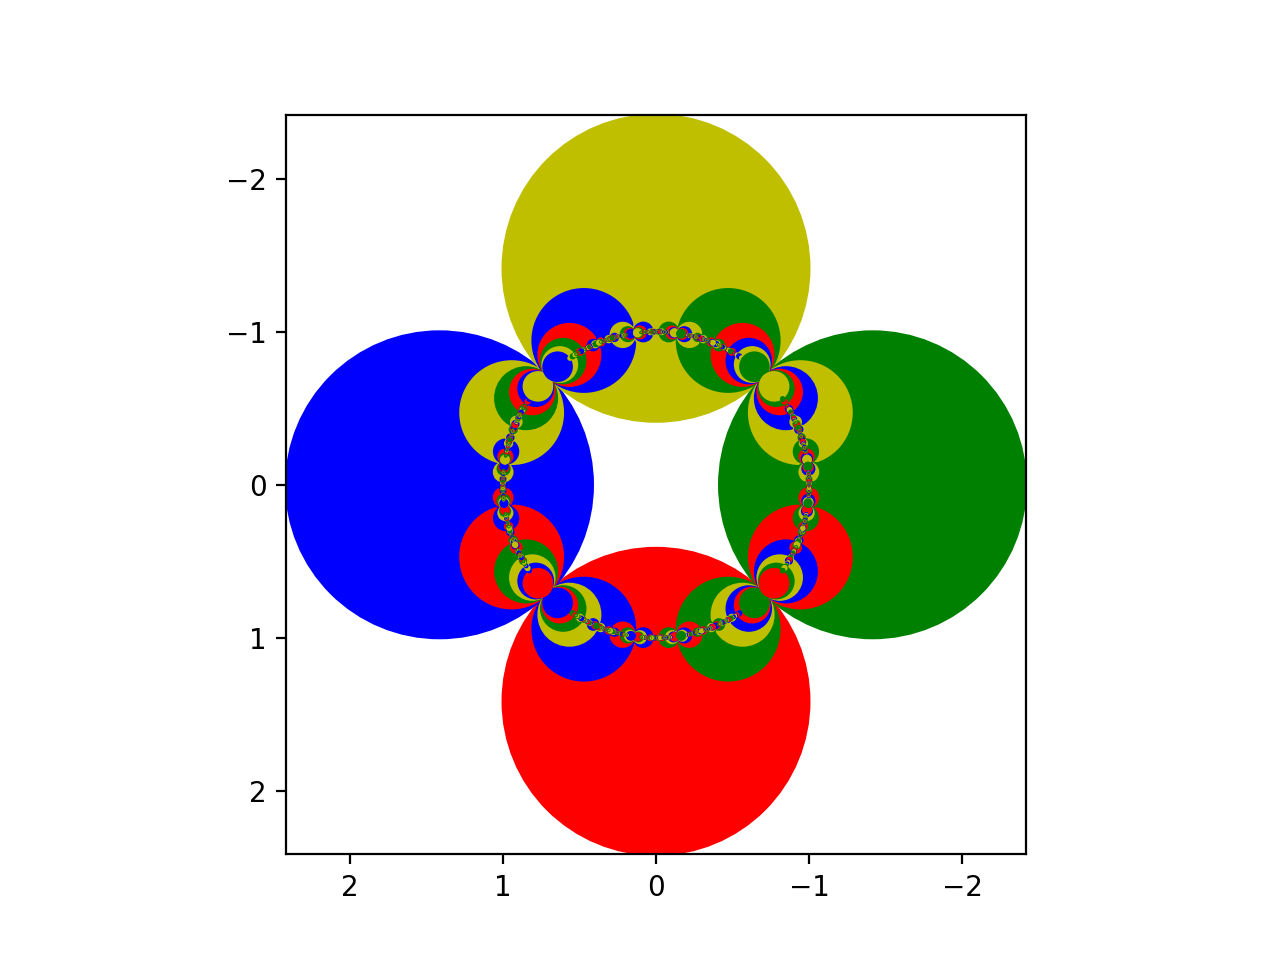

In [9]:
plot_tiles(gens, invs, tags, circs)